# Star Wars Survey Data Cleaning

The project requires adressing the question:

Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The data set:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

The data has several columns, including the following:

RespondentID — An anonymized ID for the respondent (person taking the survey)

Gender — the respondent's gender

Age — the respondent's age

Household Income — the respondent's income

Education — the respondent's education level

Location (Census Region) — the respondent's location

Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response

Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response




In [1]:
# import pandas and read  in data set

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

star_wars = pd.read_csv("star_wars.csv",encoding ="ISO-8859-1")



In [2]:
# info shows that there are 1186 entries. 38 columns 
# dtypes: float64(6), int64(1), object(31)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [3]:
#Explore data for strange values
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9                                                NaN                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9                                          NaN   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: 

In [4]:
# convert columns to boolean True or False

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map({"Yes":"True","No":"False"})

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map({"Yes":"True","No":"False"}) 




In [5]:
#check for counts of False,True and NaN
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))


print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':"seen_1",
       'Unnamed: 4':"seen_2",'Unnamed: 5':"seen_3",'Unnamed: 6':"seen_4",'Unnamed: 7':"seen_5",'Unnamed: 8':"seen_6"})



star_wars["seen_1"]=star_wars["seen_1"].map({"Star Wars: Episode I  The Phantom Menace":True,np.NaN:False})

star_wars["seen_2"]=star_wars["seen_2"].map({"Star Wars: Episode II  Attack of the Clones":True,np.NaN:False})

star_wars["seen_3"]=star_wars["seen_3"].map({"Star Wars: Episode III  Revenge of the Sith":True,np.NaN:False})

star_wars["seen_4"]=star_wars["seen_4"].map({"Star Wars: Episode IV  A New Hope":True,np.NaN:False})

star_wars["seen_5"]=star_wars["seen_5"].map({"Star Wars: Episode V The Empire Strikes Back":True,np.NaN:False})

star_wars["seen_6"]=star_wars["seen_6"].map({"Star Wars: Episode VI Return of the Jedi":True,np.NaN:False})
    
            
    
#optional for loop     
    
#movie_mapping = {
#    "Star Wars: Episode I  The Phantom Menace": True,
#    np.nan: False,
#    "Star Wars: Episode II  Attack of the Clones": True,
#    "Star Wars: Episode III  Revenge of the Sith": True,
#    "Star Wars: Episode IV  A New Hope": True,
#    "Star Wars: Episode V The Empire Strikes Back": True,
#    "Star Wars: Episode VI Return of the Jedi": True
#}

#for col in star_wars.columns[3:9]:
#    star_wars[col] = star_wars[col].map(movie_mapping)    
       
    
    
    
        
    
        
            
        
        
   
 
    
    

        
        
        
    
        

In [8]:
#convert columns to flaot type and change name of columns.

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#rename columns

star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1","Unnamed: 10":"ranking_2","Unnamed: 11":"ranking_3","Unnamed: 12":"ranking_4","Unnamed: 13":"ranking_5","Unnamed: 14":"ranking_6",})

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

<BarContainer object of 6 artists>

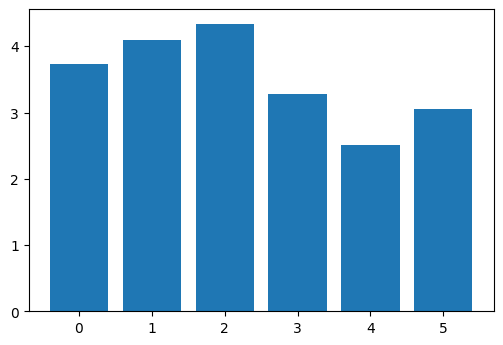

In [9]:
#compute the mean of the columns inordr to find highest ranked movie. 

plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean())

The first three Star Wars films rank highest among viewers. 

In [10]:
#Compute Sum of the seen coulumns [3:9]

star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

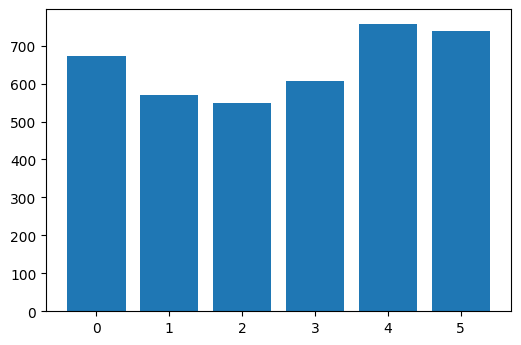

In [11]:
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())

After seeing the bar chart of sums I found that the original movies were seen the most. It reinforces the ranking bar chart.

In [12]:
# split the data into female and male groups. Use the groups to find highest viewed and ranked movie for eachgroup.

male = star_wars[star_wars["Gender"] == "Male"]

female = star_wars[star_wars["Gender"]=="Female"]

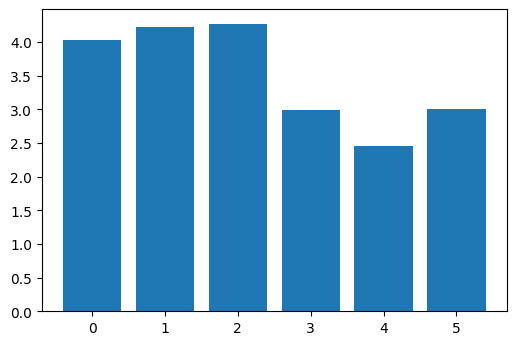

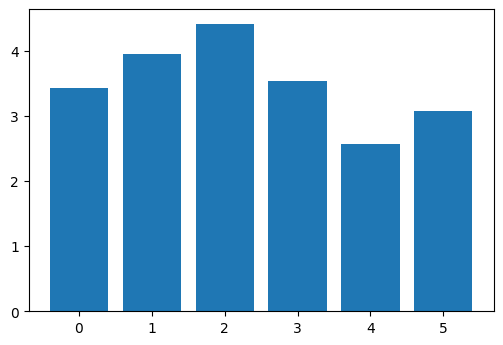

In [13]:
#Seen columns Men vs Women
plt.bar(range(6),male[male.columns[9:15]].mean())
plt.show()

plt.bar(range(6),female[female.columns[9:15]].mean())
plt.show()


In [14]:
female[female.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

In [15]:
male[male.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

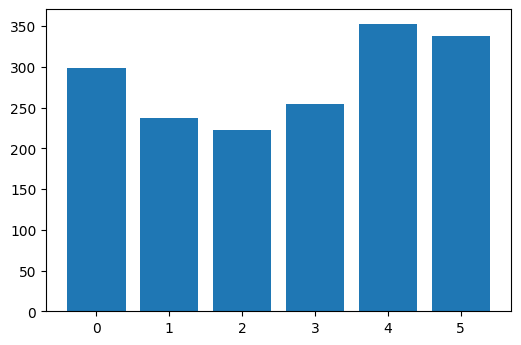

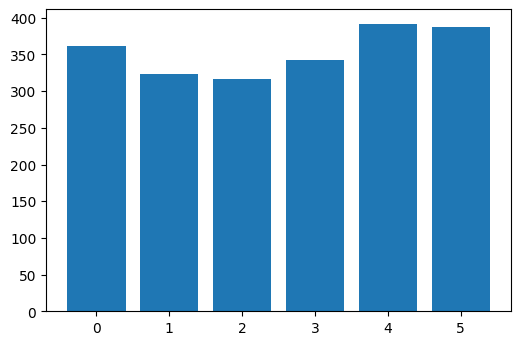

In [18]:
plt.bar(range(6),female[female.columns[3:9]].sum())
plt.show()

plt.bar(range(6),male[male.columns[3:9]].sum())
plt.show()


In [19]:
female[female.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

In [20]:
male[male.columns[3:9]].sum()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

While males tend to watch more star wars the trends were the same. The older moviews were viewed more by each segment. 